In [73]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets


In [1]:
class EDA:
    """
    A class used to perform common EDA tasks

    ...

    Attributes
    ----------
    data : dataframe
        a dataframe on which the EDA will be performed
    target : str
        the name of the target column
    cat : list
        a list of the names of the categorical columns
    num : list
        a list of the names of the numerical columns

    Methods
    -------
    display_head(self, n=5):
        displays the first n rows of the dataset using the head method.
    
    summary_statistics(self):
        print the summary statistics(mean,std,max,and min etc)
    
    missing_values(self):
        prints the sum of missing values for each column    
    
    data_types(self):
        prints the data types of each column 
    
    def info(self):
        find some basic information of the data
    
    setCat(catList)
        sets the cat variable listing the categorical column names to the list provided in the argument catList
        
        Parameters
        ----------
        catlist : list
            The list of column names that are categorical

    setNum(numList)
        sets the cat variable listing the categorical column names to the list provided in the argument catList
        
        Parameters
        ----------
        numlist : list
            The list of column names that are numerical
    numeric_alalysis(self,column):
        plots a histogram of a numeric column using the hist method
    
    categorical_distribution(self, column, filter_threshold=None):
        plots a count plot for a categorical column.
    
    bivariate_analysis_numeric(self, column1, column2):
        plots a scatter plot between two numeric columns.

    box_plot_outliers(self, column):
        plots a box plot to visualize the distribution and identify potential outliers in a numeric column.
    correlation_matrix(self):
        plots a heatmap of the correlation matrix for all numeric columns
    fullEDA()
        Displays the full EDA process. 

    """
    def __init__(self,data,target):
        self.data = data
        self.target = target
        self.cat = []
        self.num = []
    def display_head(self, n=10):
        print(self.data.head(n))
        #display the first 10 row of the data set
    def summary_stats(self):
        print(self.data.describe())
        #find the summary statistics 
    def missing(self):
        print(self.data.isnull().sum())
        #find the missing value in data
    def data_types(self):
        print(self.data.dtypes)
    
    def info(self):
        return self.data.info()

    def giveTarget(self):
        return self.target
        
    def setCat(self, catList):
        self.cat = catList
    
    def setNum(self, numList):
        self.num = numList
    def numeric_alalysis(self,column):
        plt.hist(self.data[column], bins=20, color='blue', aloha=0.7)
        plt.title(f'Distribution of {column}')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.show()
        #Plots a histogram of a numeric column
    
    def categorical_distribution(self, column, filter_threshold=None):
        if filter_threshold is not None:
            value_counts = self.data[column].value_counts()
            filtered_value_counts = value_counts[value_counts > filter_threshold]
            sns.barplot(x=filtered_value_counts.index, y=filtered_value_counts.values, palette="viridis")
            plt.title(f'Filtered Value Counts (Count > {filter_threshold}) of {column}')
        else:
            sns.countplot(self.data[column])
            plt.title(f'Distribution of {column}')
        plt.show()
        #Plots a count plot for a categorical column
    def bivariate_analysis_numeric(self, column1, column2):
        plt.scatter(self.data[column1], self.data[column2])
        plt.title(f'Scatter Plot between {column1} and {column2}')
        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.show()
        #Plots a scatter plot between two numeric columns.
    def box_plot_outliers(self, column):
        sns.boxplot(self.data[column])
        plt.title(f'Box Plot of {column}')
        plt.show()
        #Plots a box plot to visualize the distribution and identify potential outliers in a numeric column
    
    def correlation_matrix(self):
        correlation_matrix = self.data.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        plt.title('Correlation Matrix')
        plt.show()
        #Plots a heatmap of the correlation matrix for all numeric columns 
    



## Exploratory Data Analysis

This is an example of how we can use an external EDA class to automate some of the data exploration steps. 

A few points to note here:
<ul>
<li> Above, in the imports, there is a line to import "ml_utils", which is "ml_utils.py", the file we've made to contain our EDA class.
<li> In that ml_utils.py file the actual EDA code is located.  
<li> Below, we create an object of that EDA class (similarly to how we'd create an object of a LinearRegression() when making a model).
<li> To do the EDA work, we call ("ask") the object we created to generate the EDA work that we've built into the class.
</ul>

In [76]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Load External EDA Class

We want to create an object here that we can call later. 

In [78]:
eda = EDA(df,'HeartDisease')
print(eda.giveTarget())


HeartDisease


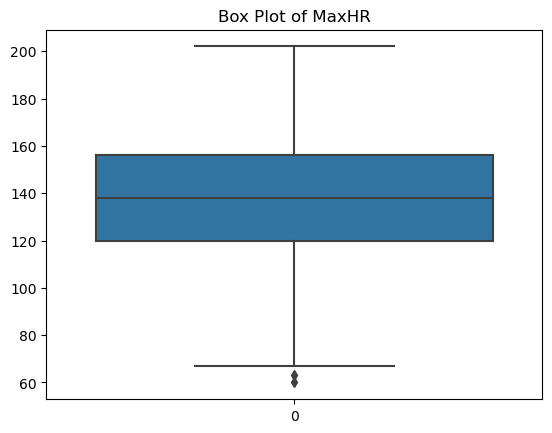

In [91]:
eda.box_plot_outliers('MaxHR')

### Provide Configuration to the EDA Class

In [79]:
EDA.setCat(df,["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"])
EDA.setNum(df,["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"])

C:\Users\ywyan\AppData\Local\Temp\ipykernel_3272\1636484008.py:91: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.cat = catList
C:\Users\ywyan\AppData\Local\Temp\ipykernel_3272\1636484008.py:94: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.num = numList


### Perform EDA

In [89]:
eda.fullEDA()

## Create an EDA Class

Your first task is to create your own EDA class, optionally based on the example code above. There isn't one correct answer or one specific set of features that your tool needs to do. The overall goal is to do as much of the EDA process as possible, with the least work required each time. Some things to consider:

<ul>
<li>How are different types of data represented and displayed?
<li>What is important to know? E.g. outliers, correlations, distributions, etc...
<li>How much customization is needed? Think about the Seaborn visualizations as an example, each chart has many options that we can optionally modify. E.g. pariplots can be useful, but can also take a long time to generate, would it be better if they were optional?
<li>Code modularity - in general, breaking up large tasks into reusable pieces of code will be preferable. If/when you add to this later on, it'll be much easier. 
<li>Commenting - we'll comment this code in the correct manner. See the example for a pattern that should be enough to follow. Commenting is dull and boring, but generally very important; we leave it mainly to the coding class to cover proper comments, but we'll do it the 'proper' way here since we are creating a portable tool. If someone else was to use this, good comments allow them to make sense of it. 
</ul>

The example code isn't comprehensive or definitive, the intent is to give a few examples of how to put things together (tabs, matplotlib figures, classes, etc). You can use whatever you want to put this together, it is also a good chance to build skills in reading documentation for the differnet libraries to adapt things to what you want. 

This tool will be peer evaluated - you'll each try out 3 other people's EDA tools and judge how useful they are and how easy they are to use. 

<h4>Utility File</h4>

When creating this EDA class, place it in a regular python file, e.g. ml_utils.py. The python file is effectively just one big code cell and pretty much everything that you write should translate directly (there's a slight possibility you might need to adjust somehting, my sample worked as is. If so, Google the error, it is probably common, then ask me if you don't get it). This utility file can also stay with you and be built upon as we go forward; any common code that you use repeatedly can be built into a function in this file, then you can just import it (like thinkstats2 and thinkplot) to your notebook, and use those things without rewriting them. 

This approach is really common, when programming we want to make things into reusable functions almost as often as possible. It saves us work, allows us to not have to think about the same challenge repeatedly, makes it easy to make improvements, and reduces the probablity of making an error. As we go, add to it! 


For development purposes, use this function in the next part, predictions with trees. 